In [2]:
%matplotlib inline

In [3]:
import os
os.getcwd()

'/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/notebooks'

In [4]:
from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import pandas as pd
import requests
from pandas import ExcelWriter

In [5]:
sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255], #JPMGreen
        [224 / 255, 120 / 255, 57 / 255], #Orange
        [205 / 255, 51 / 255, 60 / 255], #Red
        [0 / 255, 162 / 255, 88 / 255], #Green
        [51 / 255, 103 / 255, 171 / 255], #Blue
])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
# SAVEFIG_KWARGS = {'dpi': 72*4}
SAVEFIG_KWARGS = {'dpi': 1200}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'
# x_min = datetime(2020,2,15)
x_min = datetime(2016,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 370,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}

footnote_params = {
    'xy': (0,-0.15),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"

def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes

In [7]:
desired_countries_ = ['USA','BRA','RUS','ESP','GBR','ITA','FRA','IND','CHN','JPN','KOR']
desired_countries = ['USA','BRA','RUS','GBR','IND','CHN',]


In [80]:
result = requests.get("http://covid.ourworldindata.org/data/owid-covid-data.json").json()

In [81]:
def handle_nans(d):
    """
    Replace nan values with None
    Args:
        d (dict):
        
    Returns: d
    """
    
    for k in d.keys():
        if pd.isnull(d[k]):
            d[k] = None
    return d
    

In [107]:
for i, iso_code in enumerate(desired_countries):
    if i == 0:
        df = pd.DataFrame(result[iso_code])
        df['iso_code'] = iso_code
    else:
        df_ = pd.DataFrame(result[iso_code])
        df_['iso_code'] = iso_code
        df = pd.concat([df,df_],axis=0)
df.date = pd.to_datetime(df.date)


/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [108]:
print(list(df.columns))

['aged_65_older', 'aged_70_older', 'continent', 'cvd_death_rate', 'date', 'diabetes_prevalence', 'extreme_poverty', 'female_smokers', 'gdp_per_capita', 'handwashing_facilities', 'hospital_beds_per_thousand', 'iso_code', 'location', 'male_smokers', 'median_age', 'new_cases', 'new_cases_per_million', 'new_deaths', 'new_deaths_per_million', 'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'population', 'population_density', 'stringency_index', 'tests_units', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'total_tests', 'total_tests_per_thousand']


In [10]:
desired_columns = ['date','location','aged_65_older','cvd_death_rate','hospital_beds_per_100k','median_age',\
                   'population_density','stringency_index','total_cases_per_million','total_deaths_per_million',\
                   'total_tests_per_thousand']

In [109]:
desired_columns = ['date','location','gdp_per_capita','hospital_beds_per_thousand','median_age',
                   'population_density','stringency_index','total_cases_per_million',]

In [110]:
df = df[desired_columns]
df_ = df

In [280]:

# df1 = df[df.date == '2020-06-01']
df1 = df[['date','location','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']]

In [281]:
df1= df1[['date','location','stringency_index']]
df1.date = pd.to_datetime(df1.date)
df1.date = df1.date.dt.to_period(freq='D')
df1 = df1.pivot_table(index='date',columns='location',values='stringency_index')
df1 = df1.rolling(7).mean()
# df1.plot.line()

In [282]:
x_min = datetime(2020,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 30,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
yearsFmt = mdates.DateFormatter('%b-%d')
# yearsFmt = mdates.DateFormatter('%Y')

footnote_params = {
    'xy': (0,-0.14),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}


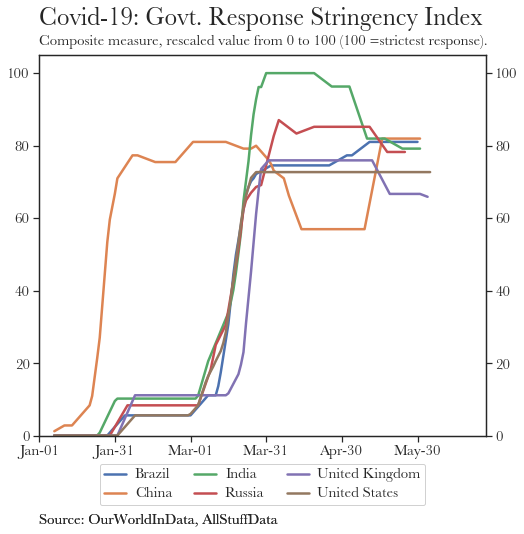

In [283]:
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax.set_ylim(0,105)
ax1 = ax.twinx()
ax1.set_ylim(0,105)
ax.set_title('Covid-19: Govt. Response Stringency Index', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Composite measure, rescaled value from 0 to 100 (100 =\
strictest response).",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: OurWorldInData, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/friday_01.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [268]:
df1 = df[df.date == '2020-06-01']
df1 = df1[['location','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']]
df1.columns = ['Countries','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']
df1 = df1.set_index('Countries')
df1 = df1[['gdp_per_capita']]
df1.rename(index={'United Kingdom':'UK'},inplace=True)
df1.rename(index={'United States':'US'},inplace=True)
df1.columns = ['GDP per capita']

In [269]:
footnote_params = {
    'xy': (0,-0.02),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}

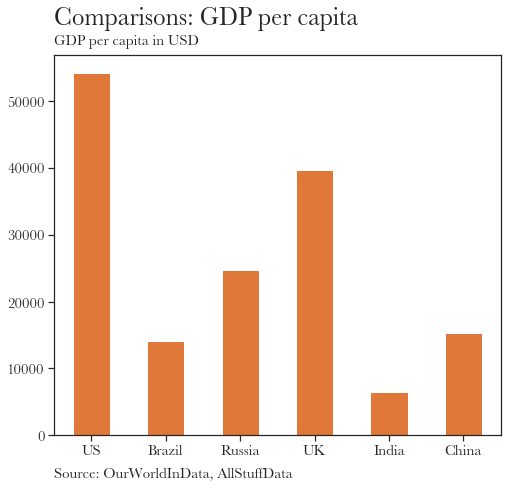

In [270]:
fig, ax = plt.subplots(figsize=(8,7))

ax = df1.plot.bar(rot=0, ax=ax, legend=False, color = pal[3])
ax.set_title('Comparisons: GDP per capita', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
# ax.set_color('orange')
fig.text(0.125,0.9,"GDP per capita in USD",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax.set_xlabel("")
footnote_text = "Source: OurWorldInData, AllStuffData"
ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/friday_02.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [271]:
df1 = df[df.date == '2020-06-01']
df1 = df1[['location','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']]
df1.columns = ['Countries','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']
df1 = df1.set_index('Countries')
df1 = df1[['hospital_beds_per_thousand']]
df1.rename(index={'United Kingdom':'UK'},inplace=True)
df1.rename(index={'United States':'US'},inplace=True)
df1.columns = ['Hospital beds per thousand']

In [272]:
footnote_params = {
    'xy': (0,-0.02),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',   
}

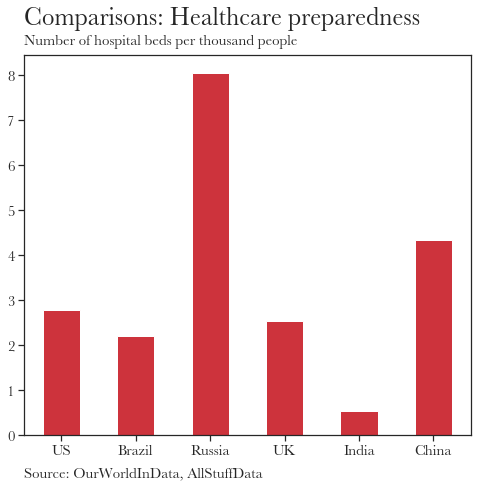

In [274]:
fig, ax = plt.subplots(figsize=(8,7))

ax = df1.plot.bar(rot=0, ax=ax, legend=False, color = pal[4])
ax.set_title('Comparisons: Healthcare preparedness', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Number of hospital beds per thousand people",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax.set_xlabel("")
footnote_text = "Source: OurWorldInData, AllStuffData"
ax.get_legend().remove()
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/friday_03.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

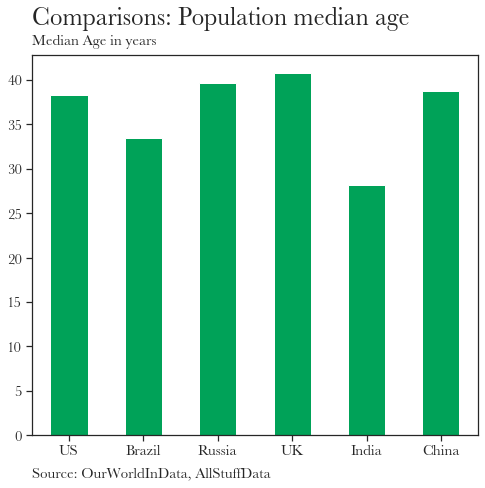

In [275]:
df1 = df[df.date == '2020-06-01']
df1 = df1[['location','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']]
df1.columns = ['Countries','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']
df1 = df1.set_index('Countries')
df1 = df1[['median_age']]
df1.rename(index={'United Kingdom':'UK'},inplace=True)
df1.rename(index={'United States':'US'},inplace=True)
df1.columns = ['Median age']

fig, ax = plt.subplots(figsize=(8,7))

ax = df1.plot.bar(rot=0, ax=ax, legend=False, color = pal[5])
ax.set_title('Comparisons: Population median age', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Median Age in years",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax.set_xlabel("")
footnote_text = "Source: OurWorldInData, AllStuffData"
ax.get_legend().remove()
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/friday_04.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

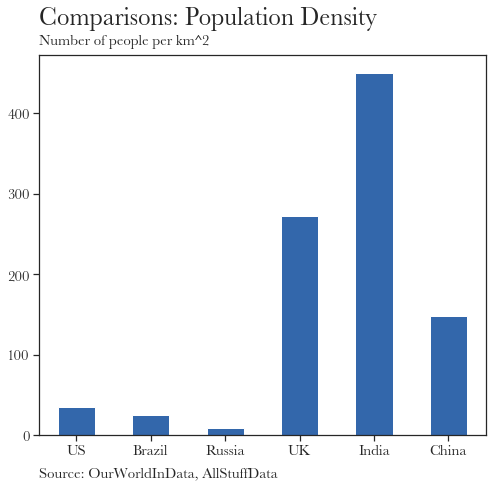

In [277]:
df1 = df[df.date == '2020-06-01']
df1 = df1[['location','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']]
df1.columns = ['Countries','gdp_per_capita','hospital_beds_per_thousand','median_age',
                    'population_density','stringency_index']
df1 = df1.set_index('Countries')
df1 = df1[['population_density']]
df1.rename(index={'United Kingdom':'UK'},inplace=True)
df1.rename(index={'United States':'US'},inplace=True)
df1.columns = ['population_density']

fig, ax = plt.subplots(figsize=(8,7))

ax = df1.plot.bar(rot=0, ax=ax, legend=False, color = pal[6])
ax.set_title('Comparisons: Population Density', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Number of people per km^2",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax.set_xlabel("")
footnote_text = "Source: OurWorldInData, AllStuffData"
ax.get_legend().remove()
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/friday_05.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

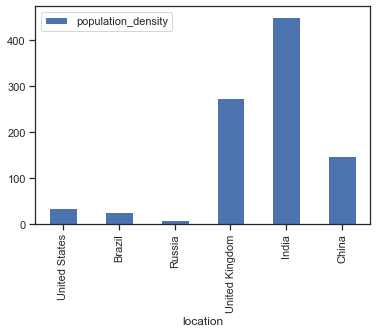

In [89]:
# df1.gdp_per_capita.to_frame().rename
df1.population_density.to_frame().plot.bar()

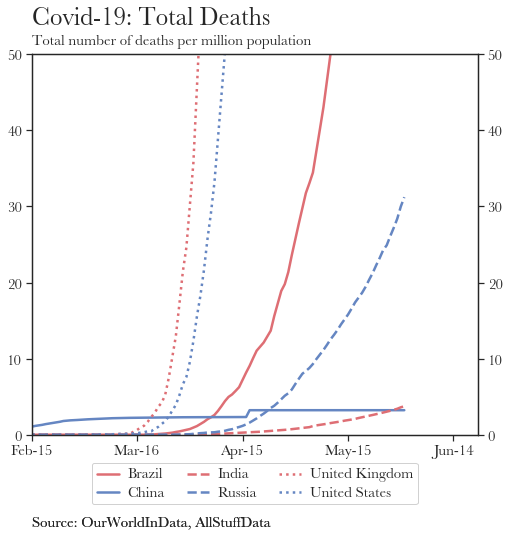

In [32]:
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], **linestyles[i], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax.set_ylim(0,50)
# ax.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax1.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax.spines['top'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax.yaxis.grid(True)
ax1 = ax.twinx()
ax1.set_ylim(0,50)
ax.set_title('Covid-19: Total Deaths', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Total number of deaths per million population",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: OurWorldInData, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/monday_02.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [78]:
df1 = df[['date','location','total_tests_per_thousand']]
df1 = df1.pivot_table(index = 'date', columns = 'location', values = 'total_tests_per_thousand')
df1.columns.name = None
df1 = df1[['India', 'Russia', 'United Kingdom', 'United States']]
df1 = df1.reset_index()
df1.date = pd.to_datetime(df1.date)
df1.date = df1.date.dt.to_period(freq='D')
df1 = df1.set_index('date')
for i, row in df1.iterrows():
    handle_nans(row.to_dict())
# df1.plot.line()
dflist.append(df1)

KeyError: "['total_tests_per_thousand'] not in index"

In [79]:
footnote_params = {
    'xy': (0,-0.1),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 4,
}

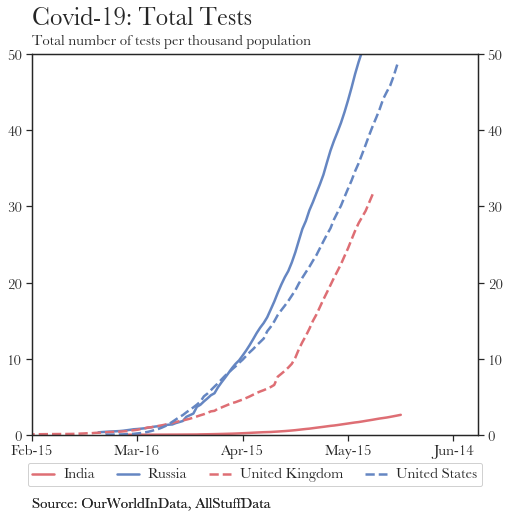

In [43]:
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], **linestyles[i], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax.set_ylim(0,50)
# ax.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax1.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax.spines['top'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax.yaxis.grid(True)
ax1 = ax.twinx()
ax1.set_ylim(0,50)
ax.set_title('Covid-19: Total Tests', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Total number of tests per thousand population",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: OurWorldInData, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/monday_03.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [86]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Monday.xlsx"
with ExcelWriter(xls_path) as writer:
    for i,df1 in enumerate(dflist):
        df1.to_excel(writer,'Sheet'+str(i))
writer.save()
    

In [6]:
#CatAndDog
f =  os.getcwd()+ '/multiTimeline.csv'
df = pd.read_csv(f)
df = df[['Week','dog_India','cat_India']]
df.columns = ['Date','Dog','Cat']
df['day'] = df.Date.str.split('/').apply(lambda x:x[0])
df['month'] = df.Date.str.split('/').apply(lambda x:x[1])
df['year'] = '20'+df.Date.str.split('/').apply(lambda x:x[2])
df.Date = df.day +'-'+ df.month +'-'+ df.year
df.Date=pd.to_datetime(df.Date, format="%d-%m-%Y")
df = df.sort_values(by=['Date'])
df.Date = df.Date.dt.to_period(freq='D')

df.Dog = df.Dog.astype(float)
df.Cat = df.Cat.astype(float)

df['week'] = df.Date.dt.week

In [7]:
df = df[['Date','Cat','Dog']]
df = df.set_index('Date')
df = df.rolling(4).mean()
df1 = df

In [8]:
df

,Cat,Dog
Date,,
2015-06-07,NaN,NaN
2015-06-14,NaN,NaN
2015-06-21,NaN,NaN
2015-06-28,31.50,69.75
2015-07-05,31.75,69.00
...,...,...
2020-04-26,32.75,88.50
2020-05-03,31.75,88.50
2020-05-10,30.25,87.75


In [9]:
df['shifted_cat'] = df.Cat.shift(52)
df['shifted_dog'] = df.Dog.shift(52)

In [10]:
df['cat_yoy'] = ((df.Cat - df.shifted_cat)/df.shifted_cat)*100
df['dog_yoy'] = ((df.Dog - df.shifted_dog)/df.shifted_dog)*100

In [12]:
df

,Cat,Dog,shifted_cat,shifted_dog,cat_yoy,dog_yoy
Date,,,,,,
2015-06-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-14,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-21,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-28,31.50,69.75,NaN,NaN,NaN,NaN
2015-07-05,31.75,69.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-04-26,32.75,88.50,21.00,68.00,55.952381,30.147059
2020-05-03,31.75,88.50,21.00,67.25,51.190476,31.598513
2020-05-10,30.25,87.75,21.50,67.00,40.697674,30.970149


In [13]:
df= df[['cat_yoy','dog_yoy']]

In [461]:
df = df.set_index('Date')

In [14]:
df.columns=['Cat','Dog']

In [463]:
df = df.rolling(4).mean()

In [15]:

df

,Cat,Dog
Date,,
2015-06-07,NaN,NaN
2015-06-14,NaN,NaN
2015-06-21,NaN,NaN
2015-06-28,NaN,NaN
2015-07-05,NaN,NaN
...,...,...
2020-04-26,55.952381,30.147059
2020-05-03,51.190476,31.598513
2020-05-10,40.697674,30.970149


In [16]:
df1=df

In [17]:
x_min = datetime(2016,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 370,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b')
yearsFmt = mdates.DateFormatter('%Y')

footnote_params = {
    'xy': (0,-0.08),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}


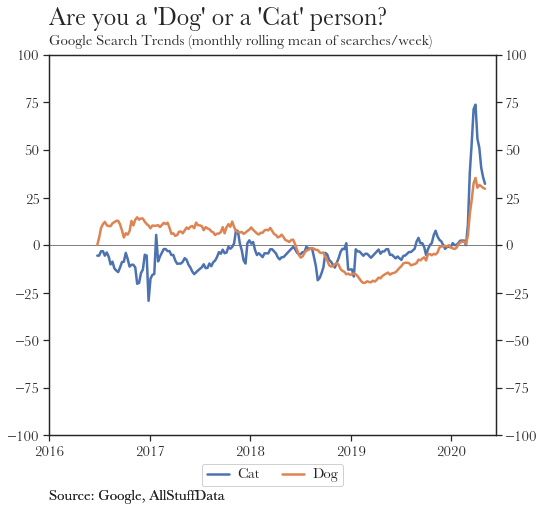

In [20]:

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
#     ax.plot(df_.index[mask].start_time.values, df_[item][mask], **linestyles[i], label = item, linewidth=2.5, zorder = 2)
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)

ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax.set_ylim(-100,100)
# ax.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax1.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax.spines['top'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax.yaxis.grid(True)
ax1 = ax.twinx()
ax1.set_ylim(-100,100)
ax.set_title("Are you a 'Dog' or a 'Cat' person?", loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Google Search Trends (monthly rolling mean of searches/week)",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/tuesday_04.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [169]:
df

,Dog,Cat
Date,,
2015-06-07,69,30
2015-06-14,74,33
2015-06-21,69,31
2015-06-28,67,32
2015-07-05,66,31
...,...,...
2020-04-26,86,29
2020-05-03,89,30
2020-05-10,87,30


In [377]:
#CatAndDog
f =  os.getcwd()+ '/multiTimeline_2.csv'
df = pd.read_csv(f)
# df = df[['Week','dog_India','cat_India']]
# df.columns = ['Date','Dog','Cat']
df['day_'] = df.Day.str.split('/').apply(lambda x:x[0])
df['month'] = df.Day.str.split('/').apply(lambda x:x[1])
df['year'] = '20'+df.Day.str.split('/').apply(lambda x:x[2])
df['Date'] = df.day_ +'-'+ df.month +'-'+ df.year
df.Date=pd.to_datetime(df.Date, format="%d-%m-%Y")
df = df.sort_values(by=['Date'])
df.Date = df.Date.dt.to_period(freq='D')
df = df[['Date','Ramayana', 'Mahabharata', 'Money Heist', 'Asur', 'Paatal Lok',]]
# df.Dog = df.Dog.astype(float)
# df.Cat = df.Cat.astype(float)

# df['week'] = df.Date.dt.week

In [378]:
df = df.set_index('Date')

In [379]:
df = df.rolling(4).mean()

In [380]:
df1=df

In [381]:
x_min = datetime(2020,3,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 15,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
yearsFmt = mdates.DateFormatter('%b-%d')
# yearsFmt = mdates.DateFormatter('%Y')

footnote_params = {
    'xy': (0,-0.14),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}


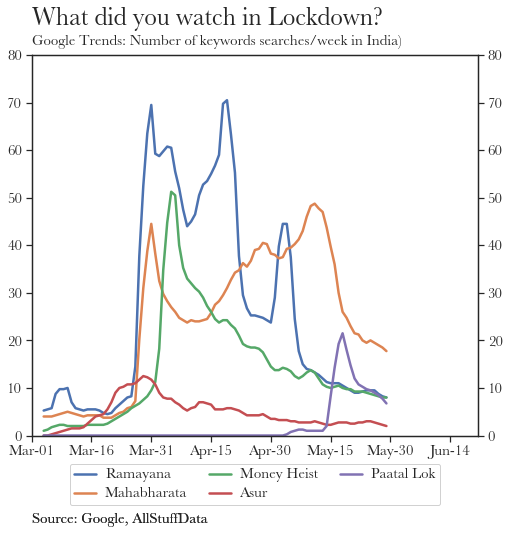

In [388]:

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask],  label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax.set_ylim(0,80)
# ax.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax1.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax.spines['top'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax.yaxis.grid(True)
ax1 = ax.twinx()
ax1.set_ylim(0,80)
ax.set_title("What did you watch in Lockdown?", loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Google Trends: Number of keywords searches/week in India)",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/wednesday_01.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)